###### Q1. Calculate the 95% confidence interval for a sample of data with a mean of 50 and a standard deviation of 5 using Python. Interpret the results.

In [1]:
import scipy.stats as stat
import numpy as np

def get_confidance_interval(n: int):
    if n < 30:
        return stat.t.interval(alpha=0.95, df=n-1, loc=50, scale=5/(n**0.5))
    return stat.norm.interval(alpha=0.95, loc=50, scale=5/(n**0.5))

print(get_confidance_interval(30))

(48.210805856282846, 51.789194143717154)


C:\Users\prita\AppData\Local\Temp\ipykernel_3896\4285358626.py:7: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  return stat.norm.interval(alpha=0.95, loc=50, scale=5/(n**0.5))


###### Q2. Conduct a chi-square goodness of fit test to determine if the distribution of colors of M&Ms in a bag matches the expected distribution of 20% blue, 20% orange, 20% green, 10% yellow, 10% red, and 20% brown. Use Python to perform the test with a significance level of 0.05.

In [2]:
import scipy.stats as stat
import numpy as np

In [3]:
expected_data = [20,20,20,10,10,20]

In [4]:
import random

def create_list_of_random_numbers_whose_sum_is_equal_to_100(n):
    """Creates a list of n random numbers whose sum is equal to 100.
    Args:
        n: The number of random numbers to create.

      Returns:
        A list of n random numbers whose sum is equal to 100.
  """

  # Generate n random numbers between 0 and 100.
    random_numbers = [random.randint(0, 100) for _ in range(n)]

  # Calculate the total sum of the random numbers.
    total_sum = sum(random_numbers)

  # Normalize the random numbers so that their sum is equal to 100.
    normalized_random_numbers = [round(100 * random_number / total_sum) for random_number in random_numbers]

  # Rounding will likely cause the final sum to not be exactly 100: pick one random number and change its value so that the total sum is exactly 100.
    random_index = random.randint(0, n - 1)
    extra = 100 - sum(normalized_random_numbers)
    normalized_random_numbers[random_index] += extra

    return normalized_random_numbers



observed_data = create_list_of_random_numbers_whose_sum_is_equal_to_100(6)
# observed_data = [19,18,21,9,11,22]
observed_data


[5, 25, 8, 12, 23, 27]

In [5]:
chisquare_test_stat, p_value = stat.chisquare(observed_data, expected_data)

In [6]:
chisquare_test_stat, p_value

(39.45, 1.9276150319975235e-07)

In [7]:
significance  = 0.05
dof = len(observed_data)-1
critical_value = stat.chi2.ppf(1-significance, dof)

In [8]:
critical_value

11.070497693516351

In [9]:
if chisquare_test_stat>critical_value:
    print('Reject the null hypothesis')
else:
    print('Accept the null hypothesis')

Reject the null hypothesis


###### Q3. Use Python to calculate the chi-square statistic and p-value for a contingency table with the following data:

        Group A Group B

    Outcome 1 20 15
    Outcome 2 10 25
    Outcome 3 15 20


Interpret the results of the test.

In [10]:
from scipy.stats import chi2_contingency
 
# defining the table
data = [[20,15], [10, 25], [15,20]]
stat, p, dof, expected = chi2_contingency(data)
 
# interpret p-value
#  H0 : Outcomes and Groups are independent
#  H1 : Outcomes and Groups are dependent
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.05411376622282158
Independent (H0 holds true)


###### Q4. A study of the prevalence of smoking in a population of 500 individuals found that 60 individuals smoked. Use Python to calculate the 95% confidence interval for the true proportion of individuals in the population who smoke.

In [11]:
def confidence_interval_for_the_true_proportion(confidance, sample_size, success_case):
    import scipy.stats 
    import numpy as np
    
    # Determine the z-critical value 
    z = scipy.stats.norm.ppf(1-((100-confidance)/200)) 
    p = success_case/sample_size
    q = 1-p
    ebp = np.sqrt((p * q)/sample_size)
    lcb = round((p - z * ebp)*100,2)
    ucb = round((p + z * ebp)*100,2)
    return (lcb,ucb)

confidance = 95
sample_size = 500
success_case = 60
low, high = confidence_interval_for_the_true_proportion(confidance= confidance, sample_size= sample_size, success_case= success_case)
print(f'We estimate with {confidance}% confidence that between {low}% and {high}% of individuals in the population smoke')

We estimate with 95% confidence that between 9.15% and 14.85% of individuals in the population smoke


###### Q5. Calculate the 90% confidence interval for a sample of data with a mean of 75 and a standard deviation of 12 using Python. Interpret the results.

In [12]:
def get_confidance_interval( n: int, alpha = 0.9, mean = 75, std = 12):
    import scipy.stats as stat
    if n < 30:
        return stat.t.interval(alpha=alpha, df=n-1, loc=mean, scale=std/(n**0.5))
    return stat.norm.interval(alpha=alpha, loc=mean, scale=std/(n**0.5))

print(get_confidance_interval(n=30))

(71.39630625889797, 78.60369374110203)


C:\Users\prita\AppData\Local\Temp\ipykernel_3896\628164931.py:5: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  return stat.norm.interval(alpha=alpha, loc=mean, scale=std/(n**0.5))


It means at 90% confidance level we can assume the population mean is in between the range of (71.39630625889797, 78.60369374110203)


###### Q6. Use Python to plot the chi-square distribution with 10 degrees of freedom. Label the axes and shade the area corresponding to a chi-square statistic of 15.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Chi-Square Distributions')

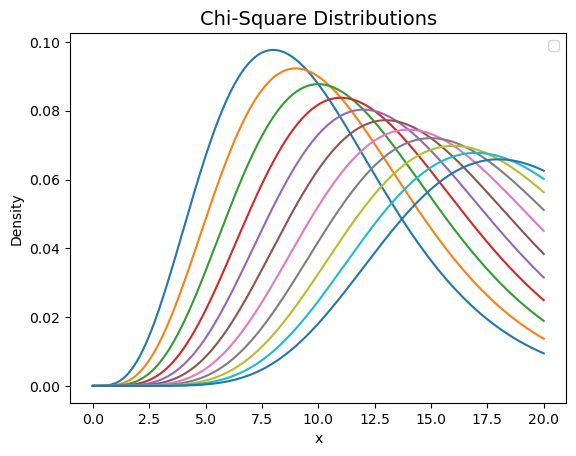

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

#x-axis ranges from 0 to 20 with .001 steps
x = np.arange(0, 20, 0.001)

#plot Chi-square distribution with 4 degrees of freedom
for df in range(10,21):
    plt.plot(x, chi2.pdf(x, df=df))
    
plt.legend()
plt.ylabel('Density')
plt.xlabel('x')
plt.title('Chi-Square Distributions', fontsize=14)

###### Q7. A random sample of 1000 people was asked if they preferred Coke or Pepsi. Of the sample, 520 preferred Coke. Calculate a 99% confidence interval for the true proportion of people in the population who prefer Coke.

In [13]:
confidance = 99
sample_size = 1000
success_case = 520
low, high = confidence_interval_for_the_true_proportion(confidance= confidance, sample_size= sample_size, success_case= success_case)
print(f'We estimate with {confidance}% confidence that between {low}% and {high}% of all people in the population prefer coke')

We estimate with 99% confidence that between 47.93% and 56.07% of all people in the population prefer coke


###### Q8. A researcher hypothesizes that a coin is biased towards tails. They flip the coin 100 times and observe 45 tails. Conduct a chi-square goodness of fit test to determine if the observed frequencies match the expected frequencies of a fair coin. Use a significance level of 0.05.

In [14]:
import scipy.stats as stat
expected_data = [50,50]
observed_data = [55,45]
chisquare_test_stat, p_value = stat.chisquare(observed_data, expected_data)
chisquare_test_stat, p_value

(1.0, 0.31731050786291115)

In [15]:
significance  = 0.05
dof = len(observed_data)-1
critical_value = stat.chi2.ppf(1-significance, dof)
critical_value

3.841458820694124

In [16]:
if chisquare_test_stat>critical_value:
    print('Reject the null hypothesis')
else:
    print('Accept the null hypothesis')

Accept the null hypothesis


###### Q9. A study was conducted to determine if there is an association between smoking status (smoker or non-smoker) and lung cancer diagnosis (yes or no). The results are shown in the contingency table below. Conduct a chi-square test for independence to determine if there is a significant association between smoking status and lung cancer diagnosis.

            Lung Cancer: Yes    Lung Cancer: No

    Smoker      60                   140
    Non-smoker  30                   170
Use a significance level of 0.05.

In [17]:
from scipy.stats import chi2_contingency
 
# defining the table
data = [[60,140], [30,170]]
stat, p, dof, expected = chi2_contingency(data)
 
# interpret p-value
#  H0 : there is a significant association between smoking status and lung cancer diagnosis.
#  H1 : there is no significant association between smoking status and lung cancer diagnosis.
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('there is no significant association between smoking status and lung cancer diagnosis.')
else:
    print('there is a significant association between smoking status and lung cancer diagnosis.')

p value is 0.0005158863863703744
there is no significant association between smoking status and lung cancer diagnosis.


###### Q10. A study was conducted to determine if the proportion of people who prefer milk chocolate, dark chocolate, or white chocolate is different in the U.S. versus the U.K. A random sample of 500 people from the U.S. and a random sample of 500 people from the U.K. were surveyed. The results are shown in the contingency table below. Conduct a chi-square test for independence to determine if there is a significant association between chocolate preference and country of origin.

                        Milk Chocolate            Dark Chocolate                      White Chocolate

    U.S. (n=500)            200                       150                                   150
    U.K. (n=500)            225                       175                                   100

Use a significance level of 0.01.

In [18]:
import scipy.stats as stat

# defining the table
data = [[200,150,150], [225,175,100]]
stat, p, dof, expected = chi2_contingency(data)
 
# interpret p-value
H0 = 'there is a significant association between chocolate preference and country of origin.'
H1 = 'there is no significant association between chocolate preference and country of origin.'
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print(H1)
else:
    print(H0)

p value is 0.0012348168997745918
there is no significant association between chocolate preference and country of origin.


###### Q11. A random sample of 30 people was selected from a population with an unknown mean and standard deviation. The sample mean was found to be 72 and the sample standard deviation was found to be 10. Conduct a hypothesis test to determine if the population mean is significantly different from 70. Use a significance level of 0.05.

In [19]:
print(get_confidance_interval(n=30, alpha = 1-0.05, mean = 72, std = 10))

(68.42161171256569, 75.57838828743431)


C:\Users\prita\AppData\Local\Temp\ipykernel_3896\628164931.py:5: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  return stat.norm.interval(alpha=alpha, loc=mean, scale=std/(n**0.5))


from the data we get that the range of the population mean is in between (68.42161171256569, 75.57838828743431). So we can conclude that 70 can be a population mean.